In [1]:
from pathlib import Path

from toolbox_continu_inzicht.base.data_adapter import Config, DataAdapter

c:\Data\Python\TBCI\toolbox-continu-inzicht\.pixi\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "test_fragility_curve_piping.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

    FragilityCurvePipingFixedWaterlevelSimple:
        debug: False
        progress: True
    
    FragilityCurvePipingFixedWaterlevel:
        debug: False
        progress: True


DataAdapter:
    default_options:
        csv:
            sep: ","
        
    probabilistic_input:
        type: excel
        file: "invoer_piping_v2.xlsx"
        index_col: 0
    waterlevels:
        type: csv
        file: "waterlevels.csv"
    fragility_curve:
        type: csv
        file: "fragility_curves_piping.csv"

```

In [3]:
from toolbox_continu_inzicht.fragility_curves import FragilityCurvePipingFixedWaterlevel

In [4]:
fragility_curve_piping_fixed_waterlevel = FragilityCurvePipingFixedWaterlevel(
    data_adapter=data_adapter
)
fragility_curve_piping_fixed_waterlevel.run(
    input=["probabilistic_input", "waterlevels"], output="fragility_curve"
)

100%|██████████| 60/60 [00:01<00:00, 52.94it/s]


<Axes: xlabel='waterlevel'>

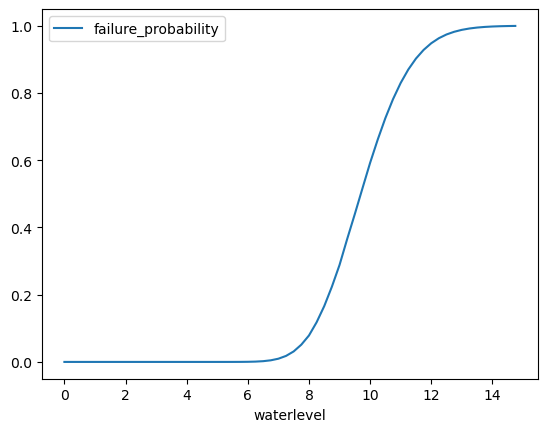

In [5]:
fragility_curve_piping_fixed_waterlevel.df_out.set_index("waterlevel").plot()

In [6]:
from toolbox_continu_inzicht.fragility_curves import (
    FragilityCurvePipingFixedWaterlevelCombined,
)

In [7]:
fragility_curve_piping_fixed_waterlevel = FragilityCurvePipingFixedWaterlevelCombined(
    data_adapter=data_adapter
)
fragility_curve_piping_fixed_waterlevel.run(
    input=["probabilistic_input", "waterlevels"], output="fragility_curve"
)

100%|██████████| 60/60 [00:03<00:00, 18.49it/s]


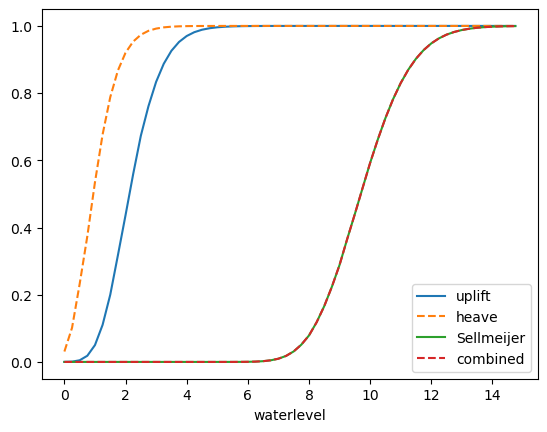

In [14]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
for index, name in enumerate(
    [
        "df_result_uplift",
        "df_result_heave",
        "df_result_Sellmeijer",
        "df_result_combined",
    ]
):
    df = fragility_curve_piping_fixed_waterlevel.__getattribute__(name)
    ls = "--"
    if index % 2 == 0:
        ls = "-"
    df.set_index("waterlevel").rename(
        columns={"failure_probability": name.split("_")[-1]}
    ).plot(ax=ax, ls=ls)